In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#importimg data
df_polty = pd.read_excel('..p5v2018.xls')

In [3]:
#checking data
df_polty.head()

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,...,NaN,1,1,1800,1,-6,88,1,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking data
df_polty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17574 entries, 0 to 17573
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p5        17574 non-null  int64  
 1   cyear     17574 non-null  int64  
 2   ccode     17574 non-null  int64  
 3   scode     17574 non-null  object 
 4   country   17574 non-null  object 
 5   year      17574 non-null  int64  
 6   flag      17574 non-null  int64  
 7   fragment  3446 non-null   float64
 8   democ     17574 non-null  int64  
 9   autoc     17574 non-null  int64  
 10  polity    17574 non-null  int64  
 11  polity2   17311 non-null  float64
 12  durable   16315 non-null  object 
 13  xrreg     17574 non-null  int64  
 14  xrcomp    17574 non-null  int64  
 15  xropen    17574 non-null  int64  
 16  xconst    17574 non-null  int64  
 17  parreg    17574 non-null  int64  
 18  parcomp   17574 non-null  int64  
 19  exrec     17391 non-null  float64
 20  exconst   17574 non-null  in

In [5]:
#getting the relevant columsn
df_polty = df_polty[['country','year','democ','autoc','polity', 'polity2','scode']]

In [6]:
df_polty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17574 entries, 0 to 17573
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  17574 non-null  object 
 1   year     17574 non-null  int64  
 2   democ    17574 non-null  int64  
 3   autoc    17574 non-null  int64  
 4   polity   17574 non-null  int64  
 5   polity2  17311 non-null  float64
 6   scode    17574 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 961.2+ KB


In [7]:
df_polty.head()

,country,year,democ,autoc,polity,polity2,scode
0,Afghanistan,1800,1,7,-6,-6.0,AFG
1,Afghanistan,1801,1,7,-6,-6.0,AFG
2,Afghanistan,1802,1,7,-6,-6.0,AFG
3,Afghanistan,1803,1,7,-6,-6.0,AFG
4,Afghanistan,1804,1,7,-6,-6.0,AFG


<AxesSubplot:>

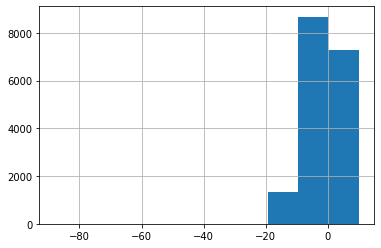

In [8]:
#distribution of polity2
df_polty.polity2.hist()

<AxesSubplot:>

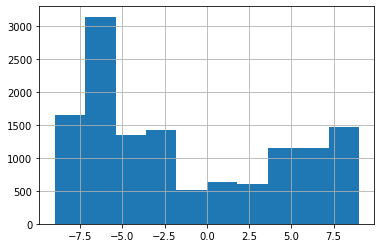

In [9]:
#distribution of polity between -10 and 10
df_polty[(df_polty.polity > -10)&(df_polty.polity < 10)]['polity'].hist()

In [10]:
#number of values to see dist of polity2
df_polty['polity2'].value_counts(dropna=False)

 10.0    2323
-7.0     1835
-6.0     1347
-10.0    1343
-3.0     1206
-9.0     1150
 8.0      789
-4.0      787
 9.0      691
 4.0      667
-5.0      607
 6.0      594
 7.0      573
-1.0      528
-8.0      519
 5.0      515
 1.0      495
 0.0      427
 2.0      353
 3.0      283
-2.0      274
 NaN      263
-66.0       4
-88.0       1
Name: polity2, dtype: int64

In [11]:
#polity2 data which is nan and less than -10
df_polty[(pd.isna(df_polty.polity2))|(df_polty.polity2 < -10)]

,country,year,democ,autoc,polity,polity2,scode
179,Afghanistan,1979,-66,-66,-66,NaN,AFG
180,Afghanistan,1980,-66,-66,-66,NaN,AFG
181,Afghanistan,1981,-66,-66,-66,NaN,AFG
182,Afghanistan,1982,-66,-66,-66,NaN,AFG
183,Afghanistan,1983,-66,-66,-66,NaN,AFG
...,...,...,...,...,...,...,...
15858,Turkey,1918,-66,-66,-66,NaN,TUR
15859,Turkey,1919,-66,-66,-66,NaN,TUR
15860,Turkey,1920,-66,-66,-66,NaN,TUR
15861,Turkey,1921,-66,-66,-66,NaN,TUR


In [12]:
#dropping list of countries having polity2 data as nan and less than -10
drop_con = list(set(df_polty[(pd.isna(df_polty.polity2))|(df_polty.polity2 < -10)]['country']))

In [13]:
df_polty = df_polty[df_polty.country.isin(drop_con)==False]

In [14]:
df_polty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11030 entries, 219 to 17573
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  11030 non-null  object 
 1   year     11030 non-null  int64  
 2   democ    11030 non-null  int64  
 3   autoc    11030 non-null  int64  
 4   polity   11030 non-null  int64  
 5   polity2  11030 non-null  float64
 6   scode    11030 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 689.4+ KB


In [15]:
df_polty.sample(10)

,country,year,democ,autoc,polity,polity2,scode
2573,Cameroon,1970,0,7,-7,-7.0,CAO
17426,Congo Kinshasa,1965,0,9,-9,-9.0,ZAI
13960,Two Sicilies,1843,0,10,-10,-10.0,SIC
3873,Cyprus,2013,10,0,10,10.0,CYP
16577,United States,1792,2,2,0,0.0,USA
4674,Egypt,1973,0,7,-7,-7.0,EGY
10157,Mozambique,2016,6,1,5,5.0,MZM
17399,Yugoslavia,1970,0,7,-7,-7.0,YUG
14655,Swaziland,1981,0,9,-9,-9.0,SWA
11883,Paraguay,1929,1,4,-3,-3.0,PAR


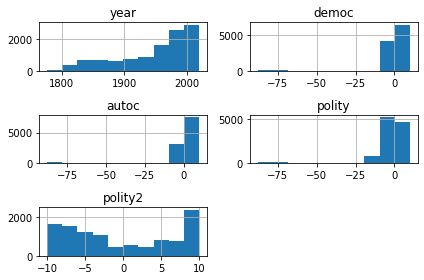

In [16]:
#checking distribution of dataset
df_polty.hist()
plt.tight_layout()
plt.show()

In [18]:
#freedom hause dataset
df_fhouse = pd.read_excel('../Country_and_Territory_Ratings_and_Statuses_FIW1973-2021.xlsx', sheet_name=1)

In [19]:
#info table about datasets
info_fhouse = pd.read_excel('../Country_and_Territory_Ratings_and_Statuses_FIW1973-2021.xlsx', sheet_name=0).iloc[:,0]

In [20]:
info_fhouse

0     The following worksheets list all country rati...
1                                                   NaN
2                                                   KEY
3     Survey Edition refers to the various editions ...
4     PR stands for Political Rights, CL stands for ...
5     F, PF, and NF stand for Free, Partly Free, and...
6                                                   NaN
7                                           METHODOLOGY
8     Until 2003, countries and territories whose co...
9     Beginning with the ratings for 2003, countries...
10    Other methodological changes have been effecte...
11    Please refer to the full methodology for more ...
12                                                  NaN
13                     COUNTRY NOTES AND CLARIFICATIONS
14    Several countries have become independent, sep...
15                                                  NaN
16    1. In the 1973 edition, South Africa was rated...
17                                              

In [21]:
df_fhouse.head()

,Survey Edition,Jan.-Feb. 1973,Unnamed: 2,Unnamed: 3,Jan.-Feb. 1974,Unnamed: 5,Unnamed: 6,Jan.-Feb. 1975,Unnamed: 8,Unnamed: 9,...,Unnamed: 135,2019,Unnamed: 137,Unnamed: 138,2020,Unnamed: 140,Unnamed: 141,2021,Unnamed: 143,Unnamed: 144
0,Year(s) Under Review,1972,NaN,NaN,1973,NaN,NaN,1974,NaN,NaN,...,NaN,2018,NaN,NaN,2019,NaN,NaN,2020,NaN,NaN
1,NaN,PR,CL,Status,PR,CL,Status,PR,CL,Status,...,Status,PR,CL,Status,PR,CL,Status,PR,CL,Status
2,Afghanistan,4,5,PF,7,6,NF,7,6,NF,...,NF,5,6,NF,5,6,NF,5,6,NF
3,Albania,7,7,NF,7,7,NF,7,7,NF,...,PF,3,3,PF,3,3,PF,3,3,PF
4,Algeria,6,6,NF,6,6,NF,6,6,NF,...,NF,6,5,NF,6,5,NF,6,5,NF


In [22]:
#dropping fist row 
df_fhouse.drop(0, inplace=True)

In [23]:
#making a list for columns, since repeat itself for each three values, getting last years values and repeatting it
#it might be a way to create stabil columsn list
col = []
for i in df_fhouse.columns[1:]:
    col.append(str(i)[-4:]) 

In [24]:
for i in range(len(col)):
    if col[i].isnumeric():
        a = int(col[i])
        col[i]=a
    else:
        col[i] = a

In [25]:
#for the first value of col list
col.insert(0,'country')

In [26]:
df_fhouse.columns = col

In [27]:
df_fhouse.head()

,country,1973,1973,1973,1974,1974,1974,1975,1975,1975,...,2018,2019,2019,2019,2020,2020,2020,2021,2021,2021
1,NaN,PR,CL,Status,PR,CL,Status,PR,CL,Status,...,Status,PR,CL,Status,PR,CL,Status,PR,CL,Status
2,Afghanistan,4,5,PF,7,6,NF,7,6,NF,...,NF,5,6,NF,5,6,NF,5,6,NF
3,Albania,7,7,NF,7,7,NF,7,7,NF,...,PF,3,3,PF,3,3,PF,3,3,PF
4,Algeria,6,6,NF,6,6,NF,6,6,NF,...,NF,6,5,NF,6,5,NF,6,5,NF
5,Andorra,4,3,PF,4,4,PF,4,4,PF,...,F,1,1,F,1,1,F,1,1,F


In [28]:
#unpivoting the dataset
df_fhouse.melt(id_vars=['country']).sort_values(['country','variable']).head(6)

,country,variable,value
1,Afghanistan,1973,4
207,Afghanistan,1973,5
413,Afghanistan,1973,PF
619,Afghanistan,1974,7
825,Afghanistan,1974,6
1031,Afghanistan,1974,NF


In [29]:
df_fhouse = df_fhouse.melt(id_vars=['country']).sort_values(['country','variable'])

In [30]:
#dropping the empty country rows
df_fhouse = df_fhouse[pd.isna(df_fhouse.country) == False]

In [31]:
df_fhouse.head()

,country,variable,value
1,Afghanistan,1973,4
207,Afghanistan,1973,5
413,Afghanistan,1973,PF
619,Afghanistan,1974,7
825,Afghanistan,1974,6


In [32]:
df_fhouse.country.value_counts()

Slovakia          144
Armenia           144
Haiti             144
Tajikistan        144
Cyprus            144
                 ... 
Cameroon          144
Venezuela         144
Timor-Leste       144
Finland           144
Czechoslovakia    144
Name: country, Length: 205, dtype: int64

In [33]:
#adding score column to assing values to its categories,
#as it is seen at the first table, 'PR','CL','Status' repeat itself, 
#and since there 144/3 couuntry values and 205 countries, it is multiplied by 48*205
df_fhouse['score']= ['PR','CL','Status']*48*205

In [34]:
df_fhouse.shape

(29520, 4)

In [35]:
#pivotting dataframe to make score values as column
df_fhouse = df_fhouse.pivot_table(columns=['score'], values=['value'], aggfunc='first', index=['country','variable']).reset_index()

In [36]:
df_fhouse.head()

country variable value          
score                          CL PR Status
0      Afghanistan     1973     5  4     PF
1      Afghanistan     1974     6  7     NF
2      Afghanistan     1975     6  7     NF
3      Afghanistan     1976     6  7     NF
4      Afghanistan     1977     6  7     NF

In [37]:
df_fhouse.columns = ['country','year','CL','PR','Status']

In [38]:
df_fhouse.head()

,country,year,CL,PR,Status
0,Afghanistan,1973,5,4,PF
1,Afghanistan,1974,6,7,NF
2,Afghanistan,1975,6,7,NF
3,Afghanistan,1976,6,7,NF
4,Afghanistan,1977,6,7,NF


In [39]:
df_fhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  6150 non-null   object
 1   year     6150 non-null   int64 
 2   CL       6150 non-null   object
 3   PR       6150 non-null   object
 4   Status   6150 non-null   object
dtypes: int64(1), object(4)
memory usage: 240.4+ KB


In [40]:
#penn world table dataset
df_penn = pd.read_excel('../pwt100.xlsx',sheet_name=2)

In [41]:
df_penn.sample(5)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
570,AUS,Australia,Australian Dollar,1960,1.616355e+05,1.654198e+05,10.470019,4.155402,1978.310818,2.746758,...,0.108588,-0.117386,-2.989292e-02,0.117178,0.112944,0.152628,0.101445,0.091887,0.087126,0.400152
9685,PSE,State of Palestine,US Dollar,1975,2.559736e+03,2.551823e+03,1.323802,NaN,NaN,NaN,...,0.106764,-1.021051,-7.528032e-02,0.226452,0.197509,0.316869,0.190804,0.180923,0.202012,NaN
6047,JOR,Jordan,Jordanian Dinar,1977,6.141488e+03,5.912421e+03,2.179363,0.400722,NaN,1.472220,...,0.200095,-0.947500,6.657600e-02,0.377255,0.344237,0.215967,0.226015,0.264413,0.298451,3.086443
7699,MEX,Mexico,Mexican Peso,2019,2.463238e+06,2.390322e+06,127.575529,54.993595,2137.000000,2.777053,...,0.266322,-0.289475,1.169247e-02,0.524662,0.604030,0.358204,0.723408,0.657725,0.460764,0.801561
3340,DJI,Djibouti,Djibouti Franc,2000,1.789048e+03,2.083788e+03,0.717584,0.235116,NaN,NaN,...,0.221301,-0.371581,1.029855e-11,0.320860,0.569196,0.233381,0.496375,0.453333,0.882683,1.805754


In [42]:
#info table 
penn_info = pd.read_excel('../pwt100.xlsx',sheet_name=1)

In [43]:
penn_info

,Variable name,Variable definition
0,Identifier variables,NaN
1,countrycode,3-letter ISO country code
2,country,Country name
3,currency_unit,Currency unit
4,year,Year
...,...,...
62,pl_g,"Price level of government consumption, price ..."
63,pl_x,"Price level of exports, price level of USA GDP..."
64,pl_m,"Price level of imports, price level of USA GDP..."
65,pl_n,"Price level of the capital stock, price level ..."


In [1]:
#importing data from world bank
import json
import wbdata 
import world_bank_data as wb

In [2]:
wb.get_topics()

,value,sourceNote
id,,
1,Agriculture & Rural Development,For the 70 percent of the world's poor who liv...
2,Aid Effectiveness,Aid effectiveness is the impact that aid has i...
3,Economy & Growth,Economic growth is central to economic develop...
4,Education,Education is one of the most powerful instrume...
5,Energy & Mining,The world economy needs ever-increasing amount...
6,Environment,Natural and man-made environmental resources –...
7,Financial Sector,An economy's financial markets are critical to...
8,Health,Improving health is central to the Millennium ...
9,Infrastructure,Infrastructure helps determine the success of ...


In [3]:
#getting countries from world bank
countries = wb.get_countries()
countries

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155
ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170
...,...,...,...,...,...,...,...,...,...
XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.35200
ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.74600


In [47]:
#names of series 
list_value_code=pd.read_excel('../WDI_CETS.xls', sheet_name=1)

In [48]:
list_value_code

,Series Code,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
0,AG.AGR.TRAC.NO,"Agricultural machinery, tractors",Environment,Agricultural production,NaN,NaN
1,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,Environment,Agricultural production,NaN,NaN
2,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,Environment,Agricultural production,NaN,NaN
3,AG.LND.AGRI.K2,Agricultural land (sq. km),Environment,Land use,NaN,NaN
4,AG.LND.AGRI.ZS,Agricultural land (% of land area),Environment,Land use,NaN,NaN
...,...,...,...,...,...,...
1499,WP15163_4.1,Mobile account (% age 15+),Financial Sector,Access,NaN,NaN
1500,WP15163_4.2,"Mobile account, male (% age 15+)",Financial Sector,Access,NaN,NaN
1501,WP15163_4.3,"Mobile account, female (% age 15+)",Financial Sector,Access,NaN,NaN
1502,WP15163_4.8,"Mobile account, income, poorest 40% (% ages 15+)",Financial Sector,Access,NaN,NaN


In [49]:
#to find relevant datas
list_value_code[list_value_code['Series Name'].str.contains('of GDP')==True]

,Series Code,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
29,BG.GSR.NFSV.GD.ZS,Trade in services (% of GDP),Economic Policy & Debt,Balance of payments,Current account,"Goods, services & income"
41,BM.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net outflows (% of ...",Economic Policy & Debt,Balance of payments,Capital & financial account,NaN
45,BN.CAB.XOKA.GD.ZS,Current account balance (% of GDP),Economic Policy & Debt,Balance of payments,Current account,Balances
71,BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)",Economic Policy & Debt,Balance of payments,Capital & financial account,NaN
77,BX.TRF.PWKR.DT.GD.ZS,"Personal remittances, received (% of GDP)",Economic Policy & Debt,Balance of payments,Current account,Transfers
80,CM.MKT.LCAP.GD.ZS,Market capitalization of listed domestic compa...,Financial Sector,Capital markets,NaN,NaN
83,CM.MKT.TRAD.GD.ZS,"Stocks traded, total value (% of GDP)",Financial Sector,Capital markets,NaN,NaN
383,EN.ATM.CO2E.KD.GD,CO2 emissions (kg per 2010 US$ of GDP),Environment,Emissions,NaN,NaN
388,EN.ATM.CO2E.PP.GD,CO2 emissions (kg per PPP $ of GDP),Environment,Emissions,NaN,NaN
389,EN.ATM.CO2E.PP.GD.KD,CO2 emissions (kg per 2011 PPP $ of GDP),Environment,Emissions,NaN,NaN


In [4]:
#dict for the value codes
my_wb_dict = {'Trade Share of GDP':'NE.TRD.GNFS.ZS',
              'Life Expectancy':'SP.DYN.LE00.IN',
              'Inflation':'FP.CPI.TOTL.ZG',
              'Exchange Rate':'PA.NUS.FCRF', 
              'Military  Exp Share':'MS.MIL.XPND.GD.ZS'
             }

In [5]:
list(my_wb_dict.values())

['NE.TRD.GNFS.ZS',
 'SP.DYN.LE00.IN',
 'FP.CPI.TOTL.ZG',
 'PA.NUS.FCRF',
 'MS.MIL.XPND.GD.ZS']

In [7]:

#getting data from world bank
world = pd.json_normalize(wbdata.get_data(list(my_wb_dict.values())[0]))
world = world[['countryiso3code','country.value','date']]
for i in list(my_wb_dict.values()):
    a = pd.json_normalize(wbdata.get_data(i))
    b = a['indicator.value'][0]
    a = a[['value']]
    a.rename(columns = {'value':b})
    world [b] = a

In [8]:
world.head()

,countryiso3code,country.value,date,Trade (% of GDP),"Life expectancy at birth, total (years)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)",Military expenditure (% of GDP)
0,ARB,Arab World,2020,NaN,NaN,NaN,NaN,NaN
1,ARB,Arab World,2019,83.917036,NaN,1.048834,NaN,5.412720
2,ARB,Arab World,2018,86.307775,71.806825,2.458142,NaN,6.049775
3,ARB,Arab World,2017,86.178597,71.622526,1.966826,NaN,6.465615
4,ARB,Arab World,2016,82.599449,71.436497,2.068840,NaN,6.152311


In [54]:
#eliminating regions
df_c = countries[['region', 'name']].rename(columns={'name': 'country'}).loc[countries.region != 'Aggregates']

In [55]:
df_world = world[world['country.value'].isin(df_c['country'])]

In [56]:
#data about corrution from wikipedia
tables = pd.read_html('https://en.wikipedia.org/wiki/Corruption_Perceptions_Index')

In [57]:
#getting wanted table
df_crptn = tables[4]

In [58]:
df_crptn.head()

Rank Nation or Territory 2020[17]       2019[18]       2018[19]        \
  Rank Nation or Territory    Score Delta    Score Delta    Score Delta   
0    1             Denmark       88   1.0       87   1.0       88   NaN   
1    1         New Zealand       88   1.0       87   NaN       87   2.0   
2    3             Finland       85   1.0       86   1.0       85   NaN   
3    3           Singapore       85   NaN       85   NaN       85   1.0   
4    3              Sweden       85   NaN       85   NaN       85   1.0   

  2017[20]       2016[21]       2015[22]       2014[23]       2013[24]        \
     Score Delta    Score Delta    Score Delta    Score Delta    Score Delta   
0       88   2.0     90.0   1.0     91.0   1.0     92.0   1.0     91.0   1.0   
1       89   1.0     90.0   1.0     91.0   NaN     91.0   NaN     91.0   1.0   
2       85   4.0     89.0   1.0     90.0   1.0     89.0   NaN     89.0   1.0   
3       84   NaN     84.0   1.0     85.0   1.0     84.0   2.0     86.0   1.0   
4       84   4.0     88.0   1.0     89.0   2.0     87.0   2.0     89.0   1.0   

  2012[25]                      
     Score Unnamed: 19_level_1  
0     90.0                 NaN  
1     90.0                 NaN  
2     90.0                 NaN  
3     87.0                 NaN  
4     88.0                 NaN

In [59]:
df_crptn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   (Rank, Rank)                                180 non-null    int64  
 1   (Nation or Territory, Nation or Territory)  180 non-null    object 
 2   (2020[17], Score)                           180 non-null    int64  
 3   (2020[17], Delta)                           110 non-null    float64
 4   (2019[18], Score)                           180 non-null    int64  
 5   (2019[18], Delta)                           128 non-null    float64
 6   (2018[19], Score)                           180 non-null    int64  
 7   (2018[19], Delta)                           125 non-null    float64
 8   (2017[20], Score)                           180 non-null    int64  
 9   (2017[20], Delta)                           146 non-null    float64
 10  (2016[21], Sco

In [60]:
#dropping last column
df_crptn = df_crptn.iloc[:,:-1]

In [61]:
df_crptn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   (Rank, Rank)                                180 non-null    int64  
 1   (Nation or Territory, Nation or Territory)  180 non-null    object 
 2   (2020[17], Score)                           180 non-null    int64  
 3   (2020[17], Delta)                           110 non-null    float64
 4   (2019[18], Score)                           180 non-null    int64  
 5   (2019[18], Delta)                           128 non-null    float64
 6   (2018[19], Score)                           180 non-null    int64  
 7   (2018[19], Delta)                           125 non-null    float64
 8   (2017[20], Score)                           180 non-null    int64  
 9   (2017[20], Delta)                           146 non-null    float64
 10  (2016[21], Sco

In [62]:
#to create an useable column list, by eliminatinf "[]" and adding year and second variable 
crt_list = ['rank','country']
for i in tables[4].columns[2:]:
    for j in ['_score','_delta']:
        a = i[0][:4]+j
        if a not in crt_list:
            crt_list.append(a)

In [63]:
crt_list

['rank',
 'country',
 '2020_score',
 '2020_delta',
 '2019_score',
 '2019_delta',
 '2018_score',
 '2018_delta',
 '2017_score',
 '2017_delta',
 '2016_score',
 '2016_delta',
 '2015_score',
 '2015_delta',
 '2014_score',
 '2014_delta',
 '2013_score',
 '2013_delta',
 '2012_score',
 '2012_delta']

In [64]:
crt_list.pop()

'2012_delta'

In [65]:
df_crptn.columns = crt_list

In [66]:
df_crptn.head()

,rank,country,2020_score,2020_delta,2019_score,2019_delta,2018_score,2018_delta,2017_score,2017_delta,2016_score,2016_delta,2015_score,2015_delta,2014_score,2014_delta,2013_score,2013_delta,2012_score
0,1,Denmark,88,1.0,87,1.0,88,NaN,88,2.0,90.0,1.0,91.0,1.0,92.0,1.0,91.0,1.0,90.0
1,1,New Zealand,88,1.0,87,NaN,87,2.0,89,1.0,90.0,1.0,91.0,NaN,91.0,NaN,91.0,1.0,90.0
2,3,Finland,85,1.0,86,1.0,85,NaN,85,4.0,89.0,1.0,90.0,1.0,89.0,NaN,89.0,1.0,90.0
3,3,Singapore,85,NaN,85,NaN,85,1.0,84,NaN,84.0,1.0,85.0,1.0,84.0,2.0,86.0,1.0,87.0
4,3,Sweden,85,NaN,85,NaN,85,1.0,84,4.0,88.0,1.0,89.0,2.0,87.0,2.0,89.0,1.0,88.0


In [67]:
#unpivoting data
df_crptn.melt(id_vars=['rank','country'])

,rank,country,variable,value
0,1,Denmark,2020_score,88.0
1,1,New Zealand,2020_score,88.0
2,3,Finland,2020_score,85.0
3,3,Singapore,2020_score,85.0
4,3,Sweden,2020_score,85.0
...,...,...,...,...
3055,176,Venezuela,2012_score,19.0
3056,176,Yemen,2012_score,23.0
3057,178,Syria,2012_score,26.0
3058,179,Somalia,2012_score,8.0


In [68]:
df_crptn= df_crptn.melt(id_vars=['rank','country'])

In [69]:
#dropping rows which have delta values
df_crptn[df_crptn.variable.str.contains('delta') == False]

,rank,country,variable,value
0,1,Denmark,2020_score,88.0
1,1,New Zealand,2020_score,88.0
2,3,Finland,2020_score,85.0
3,3,Singapore,2020_score,85.0
4,3,Sweden,2020_score,85.0
...,...,...,...,...
3055,176,Venezuela,2012_score,19.0
3056,176,Yemen,2012_score,23.0
3057,178,Syria,2012_score,26.0
3058,179,Somalia,2012_score,8.0


In [70]:
df_crptn = df_crptn[df_crptn.variable.str.contains('delta') == False]

In [71]:
#getting year values from variable column
df_crptn.variable.apply(lambda x: x[:4])

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
3055    2012
3056    2012
3057    2012
3058    2012
3059    2012
Name: variable, Length: 1620, dtype: object

In [72]:
df_crptn.variable = df_crptn.variable.apply(lambda x: x[:4])

In [73]:
df_crptn.head()

,rank,country,variable,value
0,1,Denmark,2020,88.0
1,1,New Zealand,2020,88.0
2,3,Finland,2020,85.0
3,3,Singapore,2020,85.0
4,3,Sweden,2020,85.0


In [74]:
df_crptn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rank      1620 non-null   int64  
 1   country   1620 non-null   object 
 2   variable  1620 non-null   object 
 3   value     1588 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 63.3+ KB


In [75]:
#dropping rank columns since it is unneeded
df_crptn.drop('rank',1,inplace=True)

In [76]:
df_crptn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 3059
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   1620 non-null   object 
 1   variable  1620 non-null   object 
 2   value     1588 non-null   float64
dtypes: float64(1), object(2)
memory usage: 50.6+ KB


In [77]:
df_crptn.columns =['country','year','score']

In [78]:
df_crptn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 3059
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  1620 non-null   object 
 1   year     1620 non-null   object 
 2   score    1588 non-null   float64
dtypes: float64(1), object(2)
memory usage: 50.6+ KB


In [79]:
#cheanging type of column
df_crptn.year = df_crptn.year.astype('int')

In [80]:
df_crptn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 3059
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  1620 non-null   object 
 1   year     1620 non-null   int64  
 2   score    1588 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 50.6+ KB


In [81]:
# merge

In [82]:
df_penn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countrycode    12810 non-null  object 
 1   country        12810 non-null  object 
 2   currency_unit  12810 non-null  object 
 3   year           12810 non-null  int64  
 4   rgdpe          10399 non-null  float64
 5   rgdpo          10399 non-null  float64
 6   pop            10399 non-null  float64
 7   emp            9529 non-null   float64
 8   avh            3492 non-null   float64
 9   hc             8637 non-null   float64
 10  ccon           10399 non-null  float64
 11  cda            10399 non-null  float64
 12  cgdpe          10399 non-null  float64
 13  cgdpo          10395 non-null  float64
 14  cn             10314 non-null  float64
 15  ck             7095 non-null   float64
 16  ctfp           6412 non-null   float64
 17  cwtfp          6412 non-null   float64
 18  rgdpna

In [83]:
df_penn.year.value_counts()

2015    183
2010    183
1962    183
1970    183
1978    183
       ... 
1988    183
1980    183
1972    183
1964    183
1952    183
Name: year, Length: 70, dtype: int64

In [84]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13176 entries, 2867 to 16103
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   countryiso3code                                       13176 non-null  object 
 1   country.value                                         13176 non-null  object 
 2   date                                                  13176 non-null  object 
 3   Trade (% of GDP)                                      8427 non-null   float64
 4   Life expectancy at birth, total (years)               11472 non-null  float64
 5   Inflation, consumer prices (annual %)                 7895 non-null   float64
 6   Official exchange rate (LCU per US$, period average)  10342 non-null  float64
 7   Military expenditure (% of GDP)                       7236 non-null   float64
dtypes: float64(5), object(3)
memory usage: 926.4+ KB


In [85]:
df_world.date = df_world.date.astype('int')

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [86]:
#merging world bank data and penn world table, on country code and year
df_indep = pd.merge(df_penn, df_world, right_on=['countryiso3code','date'], left_on=['countrycode','year'], how='left')

In [87]:
df_indep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   countrycode                                           12810 non-null  object 
 1   country                                               12810 non-null  object 
 2   currency_unit                                         12810 non-null  object 
 3   year                                                  12810 non-null  int64  
 4   rgdpe                                                 10399 non-null  float64
 5   rgdpo                                                 10399 non-null  float64
 6   pop                                                   10399 non-null  float64
 7   emp                                                   9529 non-null   float64
 8   avh                                                   34

In [88]:
df_polty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11030 entries, 219 to 17573
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  11030 non-null  object 
 1   year     11030 non-null  int64  
 2   democ    11030 non-null  int64  
 3   autoc    11030 non-null  int64  
 4   polity   11030 non-null  int64  
 5   polity2  11030 non-null  float64
 6   scode    11030 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 689.4+ KB


In [98]:
#merging merged data with polity, on country and year due to difference country code at polity data
df_var = pd.merge(df_indep, df_polty, left_on=['country','year'], right_on=['country','year'], how='left')

In [90]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   countrycode                                           12810 non-null  object 
 1   country                                               12810 non-null  object 
 2   currency_unit                                         12810 non-null  object 
 3   year                                                  12810 non-null  int64  
 4   rgdpe                                                 10399 non-null  float64
 5   rgdpo                                                 10399 non-null  float64
 6   pop                                                   10399 non-null  float64
 7   emp                                                   9529 non-null   float64
 8   avh                                                   34

In [91]:
#merging merged data with freedem house, on country and year due to difference unavaliable country code at freedom house data
df_var = pd.merge(df_var, df_fhouse, left_on=['country','year'], right_on=['country','year'], how='left')

In [92]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   countrycode                                           12810 non-null  object 
 1   country                                               12810 non-null  object 
 2   currency_unit                                         12810 non-null  object 
 3   year                                                  12810 non-null  int64  
 4   rgdpe                                                 10399 non-null  float64
 5   rgdpo                                                 10399 non-null  float64
 6   pop                                                   10399 non-null  float64
 7   emp                                                   9529 non-null   float64
 8   avh                                                   34

In [93]:
#merging merged data with transperancy, on country and year due to difference unavaliable country code at transperancy data
df_var = pd.merge(df_var, df_crptn, left_on=['country','year'], right_on=['country','year'], how='left')

In [94]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12810 entries, 0 to 12809
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   countrycode                                           12810 non-null  object 
 1   country                                               12810 non-null  object 
 2   currency_unit                                         12810 non-null  object 
 3   year                                                  12810 non-null  int64  
 4   rgdpe                                                 10399 non-null  float64
 5   rgdpo                                                 10399 non-null  float64
 6   pop                                                   10399 non-null  float64
 7   emp                                                   9529 non-null   float64
 8   avh                                                   34

In [95]:
df_var.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k', 'countryiso3code',
       'country.value', 'date', 'Trade (% of GDP)',
       'Life expectancy at birth, total (years)',
       'Inflation, consumer prices (annual %)',
       'Official exchange rate (LCU per US$, period average)',
       'Military expenditure (% of GDP)', 'democ', 'autoc', 'polity',
       'polity2', 'scode', 'CL', 'PR', 'Status', 'score'],
      dtype='object')

In [96]:
df_var.to_csv('dataset.csv')

In [99]:
df_fhouse.to_csv('freedom_house.csv')

In [100]:
df_world.to_csv('world_bank.csv')